In [1]:
import pyarrow.feather as feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### Se realiza la carga de los datos.

In [2]:
# lee el archivo .feather
BRCA_normal = feather.read_table("Datasets\BBRCA_normal.feather").to_pandas()
BRCA_PT = feather.read_table("Datasets\BRCA_PT.feather").to_pandas()
RED_PPI = feather.read_table("Datasets\RED_PPI.feather").to_pandas()
geneScore = feather.read_table("Datasets\geneScore.feather").to_pandas()

#### Estoy verificando la cantidad de datos presentes en los DataFrames antes de continuar con el análisis.

In [3]:
print(BRCA_normal.shape)
print(BRCA_PT.shape)
print(RED_PPI.shape)
print(geneScore.shape)

(113, 23694)
(1106, 23694)
(34814, 7)
(732, 2)


In [4]:
# Se realiza una visión general de la estructura y el contenido de los datos 
BRCA_normal.head()

,barcode,bcr_patient_barcode,bcr_sample_barcode,sample_type,vital_status,days_to_death,treatments_radiation_treatment_or_therapy,ENSG00000000003,ENSG00000000005,ENSG00000000419,...,ENSG00000288596,ENSG00000288597,ENSG00000288598,ENSG00000288605,ENSG00000288612,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675
0,TCGA-E2-A1L7-11A-33R-A144-07,TCGA-E2-A1L7,TCGA-E2-A1L7-11A,Solid Tissue Normal,Alive,NaN,yes,4209.0,71.0,1611.0,...,163.0,16.0,27.0,41.0,36.0,7.0,20.0,260.0,7.0,15.0
1,TCGA-E2-A1IG-11A-22R-A144-07,TCGA-E2-A1IG,TCGA-E2-A1IG-11A,Solid Tissue Normal,Alive,NaN,yes,2761.0,658.0,1178.0,...,85.0,8.0,15.0,9.0,31.0,2.0,15.0,344.0,14.0,12.0
2,TCGA-BH-A0BS-11A-11R-A12P-07,TCGA-BH-A0BS,TCGA-BH-A0BS-11A,Solid Tissue Normal,Alive,NaN,yes,6679.0,569.0,2240.0,...,141.0,11.0,53.0,45.0,55.0,22.0,17.0,369.0,8.0,4.0
3,TCGA-E9-A1NA-11A-33R-A144-07,TCGA-E9-A1NA,TCGA-E9-A1NA-11A,Solid Tissue Normal,Alive,NaN,yes,3541.0,1073.0,1353.0,...,129.0,12.0,27.0,61.0,24.0,10.0,28.0,267.0,17.0,15.0
4,TCGA-BH-A0H9-11A-22R-A466-07,TCGA-BH-A0H9,TCGA-BH-A0H9-11A,Solid Tissue Normal,Alive,NaN,yes,2746.0,1184.0,1047.0,...,64.0,0.0,7.0,0.0,17.0,6.0,3.0,359.0,13.0,8.0


In [5]:
# Se realiza una visión general de la estructura y el contenido de los datos 
BRCA_PT.head()

,barcode,bcr_patient_barcode,bcr_sample_barcode,sample_type,vital_status,days_to_death,treatments_radiation_treatment_or_therapy,ENSG00000000003,ENSG00000000005,ENSG00000000419,...,ENSG00000288596,ENSG00000288597,ENSG00000288598,ENSG00000288605,ENSG00000288612,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675
0,TCGA-E2-A1L7-01A-11R-A144-07,TCGA-E2-A1L7,TCGA-E2-A1L7-01A,Primary Tumor,Alive,NaN,yes,1689.0,16.0,1810.0,...,201.0,5.0,10.0,0.0,17.0,22.0,29.0,226.0,7.0,9.0
1,TCGA-AR-A0U0-01A-11R-A109-07,TCGA-AR-A0U0,TCGA-AR-A0U0-01A,Primary Tumor,Alive,NaN,yes,1590.0,0.0,2073.0,...,162.0,0.0,17.0,16.0,70.0,11.0,16.0,320.0,5.0,27.0
2,TCGA-BH-A28O-01A-11R-A22K-07,TCGA-BH-A28O,TCGA-BH-A28O-01A,Primary Tumor,Alive,NaN,yes,4583.0,135.0,1531.0,...,345.0,12.0,46.0,101.0,94.0,28.0,42.0,285.0,8.0,38.0
3,TCGA-A2-A0D4-01A-11R-A00Z-07,TCGA-A2-A0D4,TCGA-A2-A0D4-01A,Primary Tumor,Alive,NaN,yes,1550.0,45.0,2710.0,...,635.0,23.0,26.0,1.0,51.0,0.0,42.0,652.0,7.0,47.0
4,TCGA-E9-A1R4-01A-21R-A14D-07,TCGA-E9-A1R4,TCGA-E9-A1R4-01A,Primary Tumor,Alive,NaN,yes,711.0,15.0,1943.0,...,184.0,8.0,9.0,2.0,26.0,8.0,29.0,187.0,1.0,53.0


In [6]:
# Se realiza una visión general de la estructura y el contenido de los datos 
RED_PPI.head()

,Ensembl.ID,HGNC.ID,HGNC.symbol,Input-node GeneID,Output-node Gene Symbol,Output-node GeneID,Edge direction score
0,ENSG00000121931,HGNC:30299,LRIF1,55791.0,MNAT1,4331.0,0.984
1,ENSG00000086015,HGNC:19035,MAST2,23139.0,DYNLL1,8655.0,0.743
2,ENSG00000124209,HGNC:9764,RAB22A,57403.0,APPL2,55198.0,0.558
3,ENSG00000126602,HGNC:16264,TRAP1,10131.0,EXT2,2132.0,0.951
4,ENSG00000170581,HGNC:11363,STAT2,6773.0,COPS4,51138.0,0.743


In [7]:
# Se realiza una visión general de la estructura y el contenido de los datos 
geneScore.head()

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787


#### Estoy verificando las columnas presentes en los DataFrames (BRCA_normal y df1) antes de proceder con la unión.

In [8]:
print(BRCA_normal.columns)
print(BRCA_PT.columns)


Index(['barcode', 'bcr_patient_barcode', 'bcr_sample_barcode', 'sample_type',
       'vital_status', 'days_to_death',
       'treatments_radiation_treatment_or_therapy', 'ENSG00000000003',
       'ENSG00000000005', 'ENSG00000000419',
       ...
       'ENSG00000288596', 'ENSG00000288597', 'ENSG00000288598',
       'ENSG00000288605', 'ENSG00000288612', 'ENSG00000288658',
       'ENSG00000288663', 'ENSG00000288670', 'ENSG00000288674',
       'ENSG00000288675'],
      dtype='object', length=23694)
Index(['barcode', 'bcr_patient_barcode', 'bcr_sample_barcode', 'sample_type',
       'vital_status', 'days_to_death',
       'treatments_radiation_treatment_or_therapy', 'ENSG00000000003',
       'ENSG00000000005', 'ENSG00000000419',
       ...
       'ENSG00000288596', 'ENSG00000288597', 'ENSG00000288598',
       'ENSG00000288605', 'ENSG00000288612', 'ENSG00000288658',
       'ENSG00000288663', 'ENSG00000288670', 'ENSG00000288674',
       'ENSG00000288675'],
      dtype='object', length=23694)


#### Realicé la unión de los DataFrames (BRCA_normal y BRCA_PT) para consolidar la información en un solo DataFrame normal_PT.

In [9]:
normal_PT = pd.concat([BRCA_normal, BRCA_PT])

In [10]:
# dimensiones del nuevo DataFrame
normal_PT.shape

(1219, 23694)

#### Elimino las columnas innecesarias para el análisis.

In [11]:
normal_PT.drop(normal_PT.columns[[0, 1, 2, 4, 5, 6]], axis=1, inplace=True)

In [12]:
normal_PT.head()

,sample_type,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000288596,ENSG00000288597,ENSG00000288598,ENSG00000288605,ENSG00000288612,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675
0,Solid Tissue Normal,4209.0,71.0,1611.0,1217.0,346.0,787.0,5013.0,1691.0,2067.0,...,163.0,16.0,27.0,41.0,36.0,7.0,20.0,260.0,7.0,15.0
1,Solid Tissue Normal,2761.0,658.0,1178.0,611.0,165.0,651.0,5745.0,1205.0,2415.0,...,85.0,8.0,15.0,9.0,31.0,2.0,15.0,344.0,14.0,12.0
2,Solid Tissue Normal,6679.0,569.0,2240.0,1980.0,458.0,442.0,1982.0,1577.0,2296.0,...,141.0,11.0,53.0,45.0,55.0,22.0,17.0,369.0,8.0,4.0
3,Solid Tissue Normal,3541.0,1073.0,1353.0,947.0,259.0,936.0,7470.0,2097.0,2511.0,...,129.0,12.0,27.0,61.0,24.0,10.0,28.0,267.0,17.0,15.0
4,Solid Tissue Normal,2746.0,1184.0,1047.0,335.0,81.0,692.0,4576.0,1726.0,1768.0,...,64.0,0.0,7.0,0.0,17.0,6.0,3.0,359.0,13.0,8.0


In [13]:
normal_PT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1105
Columns: 23688 entries, sample_type to ENSG00000288675
dtypes: float64(23687), object(1)
memory usage: 220.3+ MB


Verifico la presencia de valores nulos en el DataFrame.

In [14]:
normal_PT.isnull().any().any()

False

In [15]:
# Define una función lambda que convierte a entero
normal_PT = normal_PT.apply(lambda col: col.astype(int) if col.name != 'sample_type' else col)

In [16]:
normal_PT.describe()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288596,ENSG00000288597,ENSG00000288598,ENSG00000288605,ENSG00000288612,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,...,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,3202.960623,119.953240,2418.218212,1654.978671,733.501231,594.675964,3572.439705,2649.777687,2353.099262,3286.878589,...,209.967186,8.164889,21.590648,19.088597,43.592289,22.205086,30.246924,441.917966,8.388023,30.395406
std,2512.943363,470.827164,1463.697505,895.727607,592.596404,581.800065,3602.508927,1603.829209,1499.880457,2785.561769,...,128.769370,12.210989,17.057007,45.355415,30.976822,58.846609,21.011192,269.258935,6.242464,32.179191
min,83.000000,0.000000,312.000000,131.000000,38.000000,29.000000,31.000000,216.000000,234.000000,354.000000,...,23.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,27.000000,0.000000,0.000000
25%,1561.500000,4.000000,1567.000000,1010.000000,374.000000,266.000000,1484.000000,1690.500000,1399.000000,1967.000000,...,124.000000,2.000000,11.000000,0.000000,24.000000,2.000000,16.000000,257.000000,4.000000,15.000000
50%,2695.000000,12.000000,2052.000000,1473.000000,584.000000,435.000000,2657.000000,2331.000000,1957.000000,2800.000000,...,179.000000,5.000000,17.000000,3.000000,36.000000,7.000000,26.000000,375.000000,7.000000,23.000000
75%,4133.000000,53.500000,2826.000000,2098.500000,910.500000,735.500000,4410.000000,3237.000000,2900.500000,3892.500000,...,260.000000,10.000000,27.000000,14.000000,54.500000,18.000000,39.000000,554.000000,11.000000,37.000000
max,40780.000000,9914.000000,17569.000000,7899.000000,9377.000000,7736.000000,39238.000000,29363.000000,14819.000000,65310.000000,...,1030.000000,244.000000,216.000000,425.000000,272.000000,1093.000000,160.000000,2287.000000,57.000000,642.000000


#### Filtrar de Datos de Expresión Génica 

In [17]:
# Obtener la matriz de muestra sin la columna 'sample_type'
matriz = normal_PT.iloc[:, 1:].values

# Calcular la expresión mínima para los genes
expresion_min = 0.0001 * np.max(matriz)

# Crear un vector lógico que indica si cada muestra tiene una expresión mayor al mínimo para cada gen
minima_expresion = matriz > expresion_min

# Contar la cantidad de muestras con expresión mayor al mínimo para cada gen
cantiad_expresion_minima = np.sum(minima_expresion, axis= 0)

# Calcular la cantidad mínima de muestras necesarias para cada gen (mínimo 20% del total de la muestra)
muestra_minima = matriz.shape[0] * 0.2

# Encontrar los genes con expresión mayor al mínimo (que estén expresados en al menos el 20% de las muestras)
genes_expresados = np.where(cantiad_expresion_minima >= muestra_minima)[0]

# Filtrar "normal_PT" para dejar solo los genes expresados
filtro_normal_PT = normal_PT.iloc[:, np.concatenate(([0], genes_expresados + 1))]


In [18]:
# Datos después de aplicar el filtro
filtro_normal_PT.shape

(1219, 11341)

Después aplicar el filtro de expresión de genes, se evidencia una significativa reducción en la cantidad de datos.

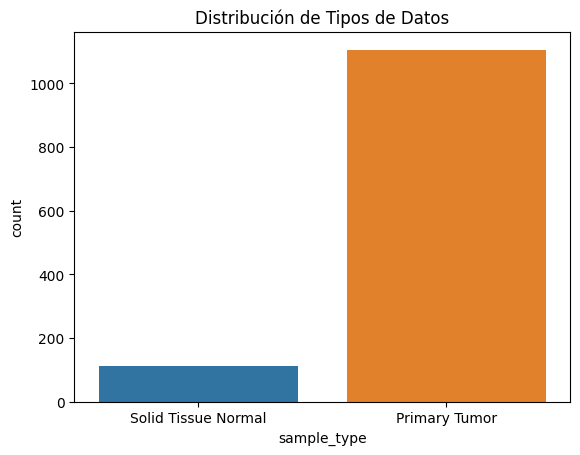

In [19]:
# gráfico de distribución de frecuencias para las categorías 
sns.countplot(x ='sample_type', data=filtro_normal_PT)
plt.title('Distribución de Tipos de Datos')
plt.show()

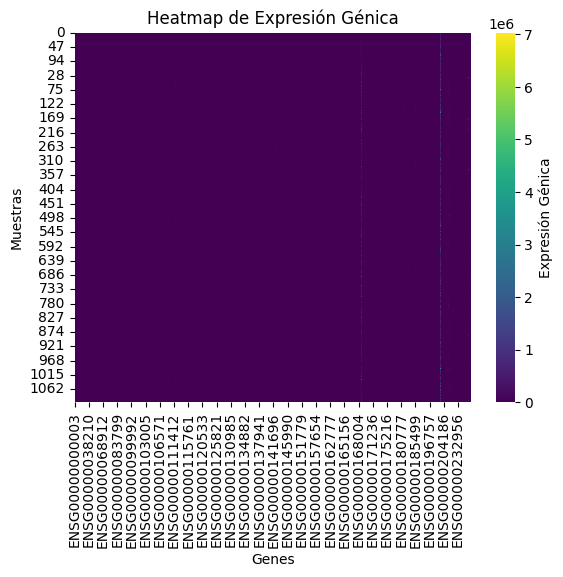

In [24]:
sns.heatmap(filtro_normal_PT.iloc[:, 1:], cmap='viridis', cbar_kws={'label': 'Expresión Génica'})
plt.title('Heatmap de Expresión Génica')
plt.xlabel('Genes')
plt.ylabel('Muestras')
plt.show()

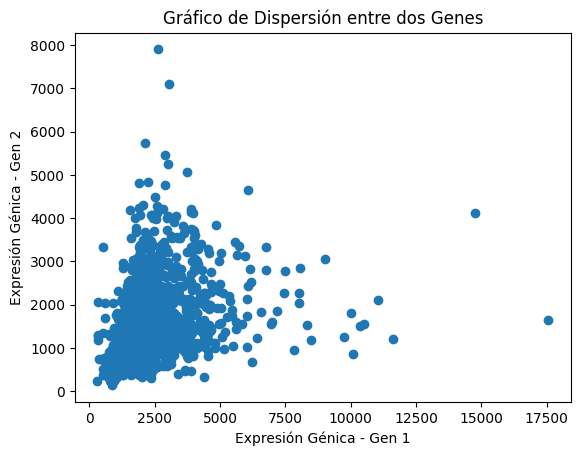

In [28]:
plt.scatter(filtro_normal_PT['ENSG00000000419'], filtro_normal_PT['ENSG00000000457'])
plt.title('Gráfico de Dispersión entre dos Genes')
plt.xlabel('Expresión Génica - Gen 1')
plt.ylabel('Expresión Génica - Gen 2')
plt.show()

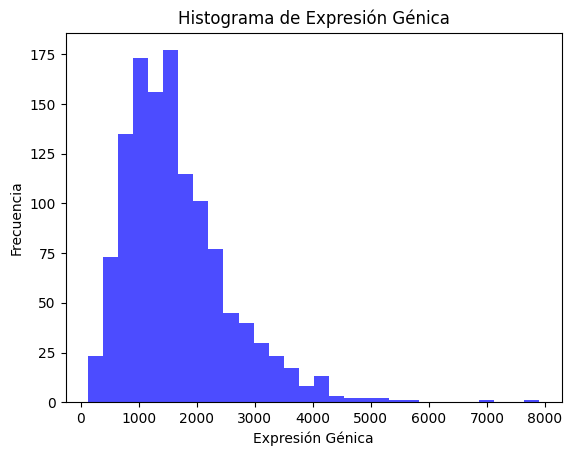

In [22]:
import matplotlib.pyplot as plt

# Selecciona una columna para el histograma
columna_seleccionada = filtro_normal_PT['ENSG00000000457']

plt.hist(columna_seleccionada, bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Expresión Génica')
plt.xlabel('Expresión Génica')
plt.ylabel('Frecuencia')
plt.show()

En el gráfico, se puede observar la distribución de muestras para 'Solid Tissue Normal' y 'Primary Tumor'.

### Análisis de diferencial de expresión (DEA)

In [19]:
expresion_datos = filtro_normal_PT

# Separar los datos en características (x) y etiquetas (y)
X = expresion_datos.iloc[:, 1:] # Las columnas 1 en adelante contienen expresiones génicas
y = expresion_datos['sample_type'] # Etiquetas

# Aplicar la prueva ANOVA para seleccionar caraterísticas diferencialmente expresadas
seleccionador = SelectKBest(score_func=f_classif, k='all')
X_seleccionado =seleccionador.fit_transform(X, y)

# Obtener puntuaciones p y características seleccionadas
p_values = seleccionador.pvalues_
genes_seleccionados = X.columns[seleccionador.get_support()]

# Crear un DataFrame con los resultados
resultados_dea = pd.DataFrame({'Gen': genes_seleccionados, 'P_Value': p_values[seleccionador.get_support()]})

# Filtrar genes significativamente diferenciados
umbral =0.05
genes_diferenciales = resultados_dea[resultados_dea['P_Value'] < umbral]

# Establecer fromato de decimales para el resultado
pd.set_option('display.float_format', lambda x: '%.15f' % x)

# Mostrar los primeros genes diferencialmente expresados
genes_diferenciales.head()

,Gen,P_Value
0,ENSG00000000003,0.000000000019983
1,ENSG00000000419,0.000001048946956
2,ENSG00000000457,0.000006649635452
3,ENSG00000000460,0.000000000000001
4,ENSG00000000938,0.002497852081433


Los resultados de 'P-Value' representan los valores p obtenidos mediante la realización de la prueba de hipótesis, específicamente la prueba de ANOVA univariante en este caso. Se observa que los valores p son muy bajos, indicando que hay diferencias significativas en la expresión génica de los genes enlistados entre las muestras de 'Solid Tissue Normal' y 'Primary Tumor'.

Creé un archivo CSV con los datos analizados de "BBRCA_normal" y "BRCA_PT"

In [19]:
filtro_normal_PT.to_csv('filtro_normal_PT.csv', index=False)

Continúo con el análisis y la adaptación de la red PPI (Protein-Protein Interaction).

In [20]:
# Se realiza una visión general de la estructura y el contenido de los datos 
RED_PPI.head()

,Ensembl.ID,HGNC.ID,HGNC.symbol,Input-node GeneID,Output-node Gene Symbol,Output-node GeneID,Edge direction score
0,ENSG00000121931,HGNC:30299,LRIF1,55791.0,MNAT1,4331.0,0.984
1,ENSG00000086015,HGNC:19035,MAST2,23139.0,DYNLL1,8655.0,0.743
2,ENSG00000124209,HGNC:9764,RAB22A,57403.0,APPL2,55198.0,0.558
3,ENSG00000126602,HGNC:16264,TRAP1,10131.0,EXT2,2132.0,0.951
4,ENSG00000170581,HGNC:11363,STAT2,6773.0,COPS4,51138.0,0.743


Se procede a verificar la estructura de los datos.

In [21]:
RED_PPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34814 entries, 0 to 34813
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ensembl.ID               34678 non-null  object 
 1   HGNC.ID                  34814 non-null  object 
 2   HGNC.symbol              34701 non-null  object 
 3   Input-node GeneID        34814 non-null  float64
 4   Output-node Gene Symbol  34814 non-null  object 
 5   Output-node GeneID       34814 non-null  float64
 6   Edge direction score     34814 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.9+ MB


#### Se realiza un filtro de genes utilizando 'filtro_normal_PT' en la 'RED_PPI' para identificar los genes comunes.

In [22]:
# Encontrar los genes comunes
genes_comunes = set(filtro_normal_PT.columns[1:]) & set(RED_PPI['Ensembl.ID'])

# Filtrar los DataFrames para incluir solo los genes comunes en ambos DataFrames
genes_comunes = RED_PPI[RED_PPI['Ensembl.ID'].isin(genes_comunes)]

In [23]:
genes_comunes

,Ensembl.ID,HGNC.ID,HGNC.symbol,Input-node GeneID,Output-node Gene Symbol,Output-node GeneID,Edge direction score
0,ENSG00000121931,HGNC:30299,LRIF1,55791.0,MNAT1,4331.0,0.984
1,ENSG00000086015,HGNC:19035,MAST2,23139.0,DYNLL1,8655.0,0.743
2,ENSG00000124209,HGNC:9764,RAB22A,57403.0,APPL2,55198.0,0.558
3,ENSG00000126602,HGNC:16264,TRAP1,10131.0,EXT2,2132.0,0.951
4,ENSG00000170581,HGNC:11363,STAT2,6773.0,COPS4,51138.0,0.743
...,...,...,...,...,...,...,...
34809,ENSG00000139842,HGNC:2554,CUL4A,8451.0,CAND1,55832.0,0.984
34810,ENSG00000163938,HGNC:29931,GNL3,26354.0,PPP2R5A,5525.0,0.798
34811,ENSG00000044574,HGNC:5238,HSPA5,3309.0,DNAJC1,64215.0,0.931
34812,ENSG00000197122,HGNC:11283,SRC,6714.0,AKT1,207.0,0.870


Después de aplicar el filtro, se eliminan 6142 genes de la RED_PPI.

#### Calcular el grado de conexión de los genes y filtrar los 100 genes con mayor conexión.

In [24]:
# Contar la frecuencia de los genes en la columna 'HGNC.symbol'
count_hgnc_symbol = genes_comunes['HGNC.symbol'].value_counts()

# Contar la frecuencia de los genes en la columna 'Output-node Gene Symbol'
count_output_symbol = genes_comunes['Output-node Gene Symbol'].value_counts()

# Combinar los resultados y sumar las frecuencias
total_counts = count_hgnc_symbol.add(count_output_symbol, fill_value=0)

# Crear un DataFrame con el resultado del conteo y el 'Ensembl.ID' correspondiente a cada gen
resultado_final = pd.DataFrame({
    'HGNC.symbol': total_counts.index,
    'Count': total_counts.values
})

# Agregar la información del 'Ensembl.ID' sin duplicados
resultado_final['Ensembl.ID'] = resultado_final['HGNC.symbol'].map(genes_comunes.drop_duplicates('HGNC.symbol').set_index('HGNC.symbol')['Ensembl.ID'])

In [25]:
#  Se ordena el DataFrame por la columna 'Count' de forma descendente y seleciona los 100 con mayor puntaje
top_genes = resultado_final.sort_values('Count', ascending=False).head(100)

In [26]:

top_genes

,HGNC.symbol,Count,Ensembl.ID
5542,TP53,279.0,ENSG00000141510
1635,EP300,250.0,ENSG00000100393
1160,CREBBP,248.0,ENSG00000005339
5951,YWHAG,237.0,ENSG00000170027
4967,SMAD3,210.0,ENSG00000166949
...,...,...,...
2227,HDAC2,70.0,ENSG00000196591
5251,SYK,70.0,ENSG00000165025
5573,TRAF6,70.0,ENSG00000175104
3059,MAPK8,70.0,ENSG00000107643


In [27]:
top_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 5542 to 4424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HGNC.symbol  100 non-null    object 
 1   Count        100 non-null    float64
 2   Ensembl.ID   100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


He creado un archivo CSV con los 100 genes de mayor conexión seleccionados en la red PPI, denominado 'top_genes'.

In [28]:
top_genes.to_csv('top_genes.csv', index=False)

#### Continúo con el análisis y la adaptación de la geneScore.

In [29]:
# Se realiza una visión general de la estructura y el contenido de los datos
# Se utilizo el gen PIK3R1 para crear geneScore y utilizar los 100 genes con mayor score como predictores.
geneScore.head()

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787


In [30]:
geneScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   features  732 non-null    object 
 1   score     732 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.6+ KB


In [31]:
# Encontrar los genes comunes
genescore_comunes = set(filtro_normal_PT.columns[1:]) & set(geneScore['features'])

# Filtrar los DataFrames para incluir solo los genes comunes en ambos DataFrames
genescore_comunes = geneScore[geneScore['features'].isin(genescore_comunes)]

genescore_comunes

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787
...,...,...
705,ENSG00000142910,0.000000
717,ENSG00000053747,0.000000
718,ENSG00000169783,0.000000
727,ENSG00000103528,0.000000


Se puede observar que 'geneScore' cuenta con 469 genes en común con el DataFrame 'filtro_normal_PT'.

In [32]:
# Ordenar geneScore por mayor score
top_geneScore = genescore_comunes.sort_values(by='score', ascending=False)

# nuevo DataFrame con los 100 genes con mayor score
top_geneScore = top_geneScore.head(100)

top_geneScore

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787
...,...,...
150,ENSG00000157554,0.004098
138,ENSG00000140285,0.004098
154,ENSG00000170989,0.004098
158,ENSG00000111077,0.004098


He creado un archivo CSV con los 100 genes de mayor puntuación seleccionados en 'geneScore', denominado 'top_geneScore'.

In [33]:
top_geneScore.to_csv('top_geneScore.csv', index=False)